In [176]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import numpy as np
from scipy.stats import binned_statistic_2d
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from src.gsam import *
from src.plotting import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [177]:
gsam_df = gsam_feature_database()
# only look for PFs with heavy rain (>10 mm/hr when scaled to GPM grid)
gsam_df = gsam_df[gsam_df['heavy_rain_pixels']>0]
env_df = gsam_df[~(np.isnan(gsam_df['env_mean_CAPE']))]

In [178]:
def _plot_bin_mean(ax, x_data, x_bins, y_data, y_bins, data, cmap, norm):
    mean = binned_statistic_2d(
        x=y_data,
        y=x_data,
        values=data,
        bins=[y_bins, x_bins],
        statistic=lambda x: np.nanmean(x) if x.size > 1 else np.nan,
    ).statistic

    x_mesh, y_mesh = np.meshgrid(x_bins, y_bins)

    c = ax.pcolormesh(
        x_mesh,
        y_mesh,
        mean,
        norm=norm,
        cmap=make_discrete_cmap(cmap, 10),
    )
    cb = fig.colorbar(c)

    return ax

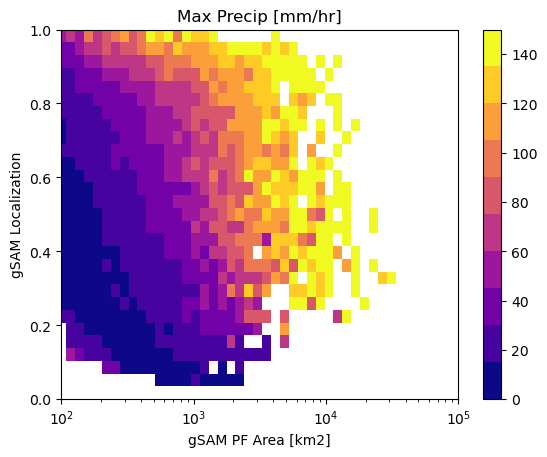

In [179]:
fig, ax = plt.subplots()
x_data = gsam_df['feature_size_pixels'] * 16
y_data = gsam_df['largest_heavy_rain_core_precip'] / gsam_df['total_precip']
x_bins = np.logspace(np.log10(50), 5, 50)
y_bins = np.linspace(0,1,30)
data = gsam_df['max_precip']/24
cmap = plt.cm.plasma
norm = colors.Normalize(vmin=0.0, vmax=150)
_plot_bin_mean(ax, x_data, x_bins, y_data, y_bins, data, cmap, norm)
ax.set_xscale('log')
ax.set_xlim(1e2, 1e5)
ax.set_title(rf'Max Precip [mm/hr]')
ax.set_xlabel('gSAM PF Area [km2]')
ax.set_ylabel('gSAM Localization')
save_figure(fig, 'gSAM Max Precip')

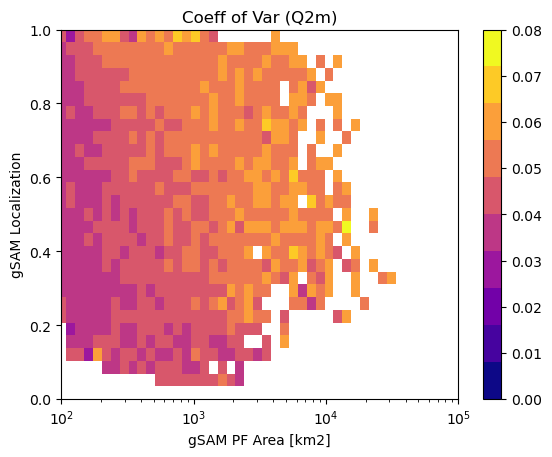

In [184]:
fig, ax = plt.subplots()
x_data = gsam_df['feature_size_pixels'] * 16
y_data = gsam_df['largest_heavy_rain_core_precip'] / gsam_df['total_precip']
x_bins = np.logspace(np.log10(50), 5, 50)
y_bins = np.linspace(0,1,30)
data = gsam_df['std_Q2m']/gsam_df['mean_Q2m']
cmap = plt.cm.plasma
norm = colors.Normalize(vmin=0.0, vmax=0.08)
_plot_bin_mean(ax, x_data, x_bins, y_data, y_bins, data, cmap, norm)
ax.set_xscale('log')
ax.set_xlim(1e2, 1e5)
ax.set_title(rf'Coeff of Var (Q2m)')
ax.set_xlabel('gSAM PF Area [km2]')
ax.set_ylabel('gSAM Localization')
save_figure(fig, 'Coeff of variation Q2m')

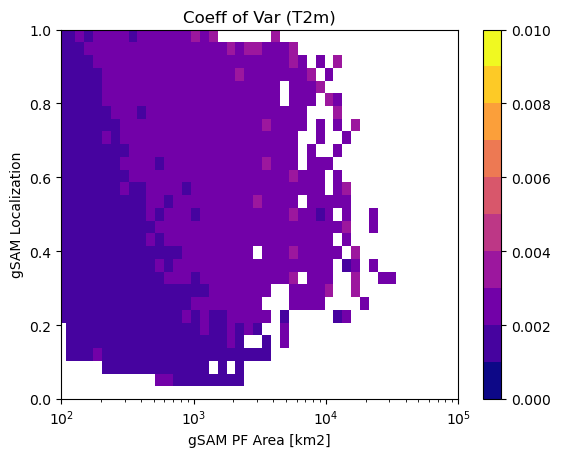

In [185]:
fig, ax = plt.subplots()
x_data = gsam_df['feature_size_pixels'] * 16
y_data = gsam_df['largest_heavy_rain_core_precip'] / gsam_df['total_precip']
x_bins = np.logspace(np.log10(50), 5, 50)
y_bins = np.linspace(0,1,30)
data = gsam_df['std_T2m']/gsam_df['mean_T2m']
cmap = plt.cm.plasma
norm = colors.Normalize(vmin=0.0, vmax=0.01)
_plot_bin_mean(ax, x_data, x_bins, y_data, y_bins, data, cmap, norm)
ax.set_xscale('log')
ax.set_xlim(1e2, 1e5)
ax.set_title(rf'Coeff of Var (T2m)')
ax.set_xlabel('gSAM PF Area [km2]')
ax.set_ylabel('gSAM Localization')
save_figure(fig, 'Coeff of variation T2m')

/var/folders/1t/6drgwyc17q12xmq4h7m454vw0000gn/T/ipykernel_14324/2902154939.py:7: RuntimeWarning: Mean of empty slice
  statistic=lambda x: np.nanmean(x) if x.size > 1 else np.nan,


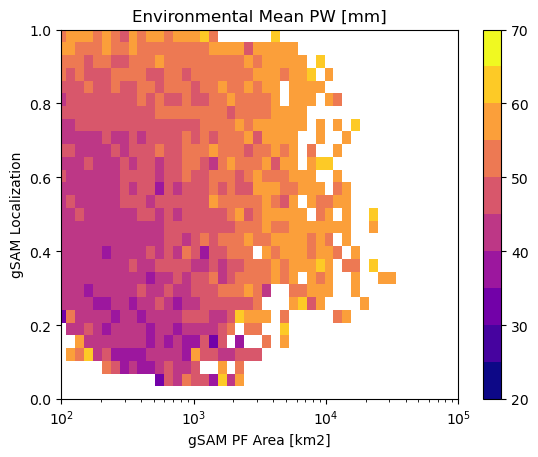

In [186]:
fig, ax = plt.subplots()
x_data = gsam_df['feature_size_pixels'] * 16
y_data = gsam_df['largest_heavy_rain_core_precip'] / gsam_df['total_precip']
x_bins = np.logspace(np.log10(50), 5, 50)
y_bins = np.linspace(0,1,30)
data = gsam_df['env_mean_PW']
cmap = plt.cm.plasma
norm = colors.Normalize(vmin=20, vmax=70)
_plot_bin_mean(ax, x_data, x_bins, y_data, y_bins, data, cmap, norm)
ax.set_xscale('log')
ax.set_xlim(1e2, 1e5)
ax.set_title(rf'Environmental Mean PW [mm]')
ax.set_xlabel('gSAM PF Area [km2]')
ax.set_ylabel('gSAM Localization')
save_figure(fig, 'Environmental Mean PW')